### Network Analysis of Protein-Protein Interaction

In [23]:
#import libraries
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter
from networkx.algorithms.community import k_clique_communities
from operator import itemgetter

#load file (DM-LC)
df = pd.read_csv('DM-LC.txt',  sep= '\s+', header = None)
#df = pd.read_table('DM-LC.txt', header= None)
df.head()



,0,1,2
0,B0024.14,F38E9.2,3.4297
1,B0025.2,F11C1.6,3.4297
2,B0025.2,F55D12.4,3.4297
3,B0025.2,F57B9.10,3.4297
4,B0035.10,B0207.4,3.4297


(-1.0987164403785854,
 1.070921960054794,
 -1.0760438308464417,
 1.0610203013168704)

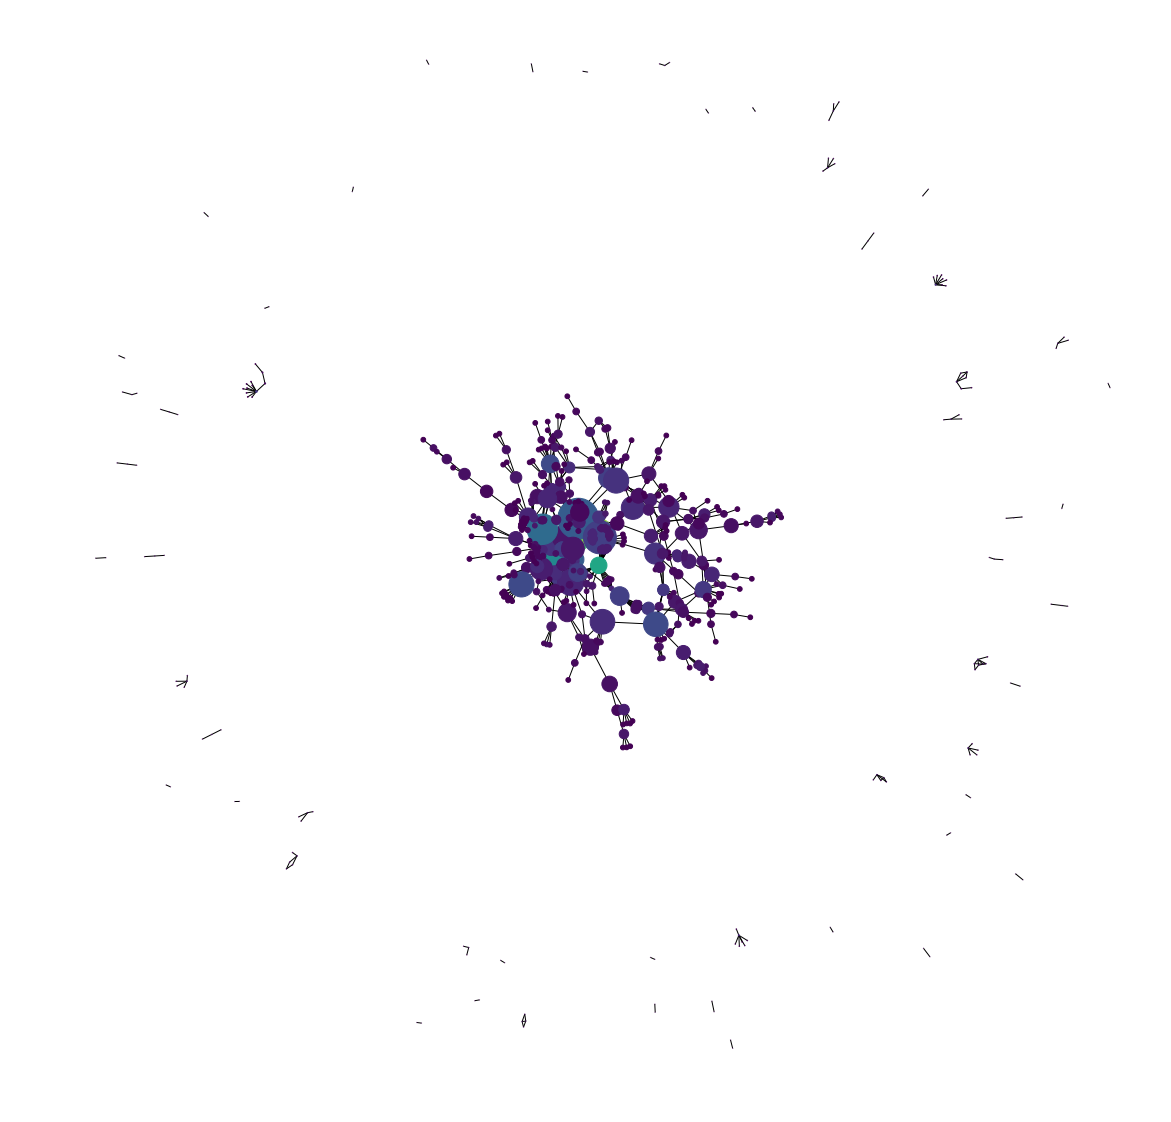

In [24]:
#Q1. Create network (g) with Networkx
g = nx.Graph()
for i in range(len(df)):
    node=df.loc[i,:][0] # first column as node
    next_node=df.loc[i,:][1]# first column as  node
    weight=df.loc[i,:][2] # third column as edge cost/weight
    g.add_weighted_edges_from([(node,next_node,weight)])
    #print(node,next_node,weight) 
    

#position nodes 
pos = nx.spring_layout(g)

#calculate betweeness centrality 
betCent = nx.betweenness_centrality(g, normalized=True, endpoints=True)

#node color varies with Degree
node_color = [20000.0 * g.degree(v) for v in g] 

# node size varies with betweeness centrality
node_size =  [v * 10000 for v in betCent.values()]

#create figure
plt.figure(figsize=(20,20))
nx.draw_networkx(g, pos=pos, with_labels=False, node_color=node_color, node_size=node_size)
plt.axis('off')

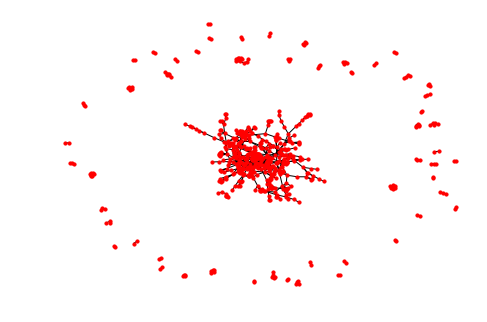

In [25]:
#another way to draw graph
G = nx.read_weighted_edgelist('DM-LC.txt')
nx.draw(G,  node_size=10)

In [26]:
#Q2. Compute number of nodes, number of edges and the average degree of the network
network_info = nx.info(g)
print(network_info)
#n,k = g.order(), g.size()
#av_degree = 2*float(k)/n
#print(av_degree)

Name: 
Type: Graph
Number of nodes: 658
Number of edges: 1129
Average degree:   3.4316


In [27]:
#another solution
print('No. of nodes: ', nx.number_of_nodes(g))
print('No. of edeges: ', nx.number_of_edges(g))


degrees = [deg for (node, deg) in nx.degree(g)]  # The degrees of each node
avg_degree = sum(degrees) / float(len(degrees))
print('Average degree: ', avg_degree )
print("Average degree: ", 2 * nx.number_of_edges(g) / nx.number_of_nodes(g))

No. of nodes:  658
No. of edeges:  1129
Average degree:  3.43161094224924
Average degree:  3.43161094224924


In [28]:
#Q3. Compute the density of the network
density = nx.density(g)
print("Network density:", density)

Network density: 0.005223152119100822


Name: 
Type: Graph
Number of nodes: 658
Number of edges: 603
Average degree:   1.8328


(-1.0684723895779835,
 1.088676814436077,
 -1.1024762475916197,
 1.0965840900369934)

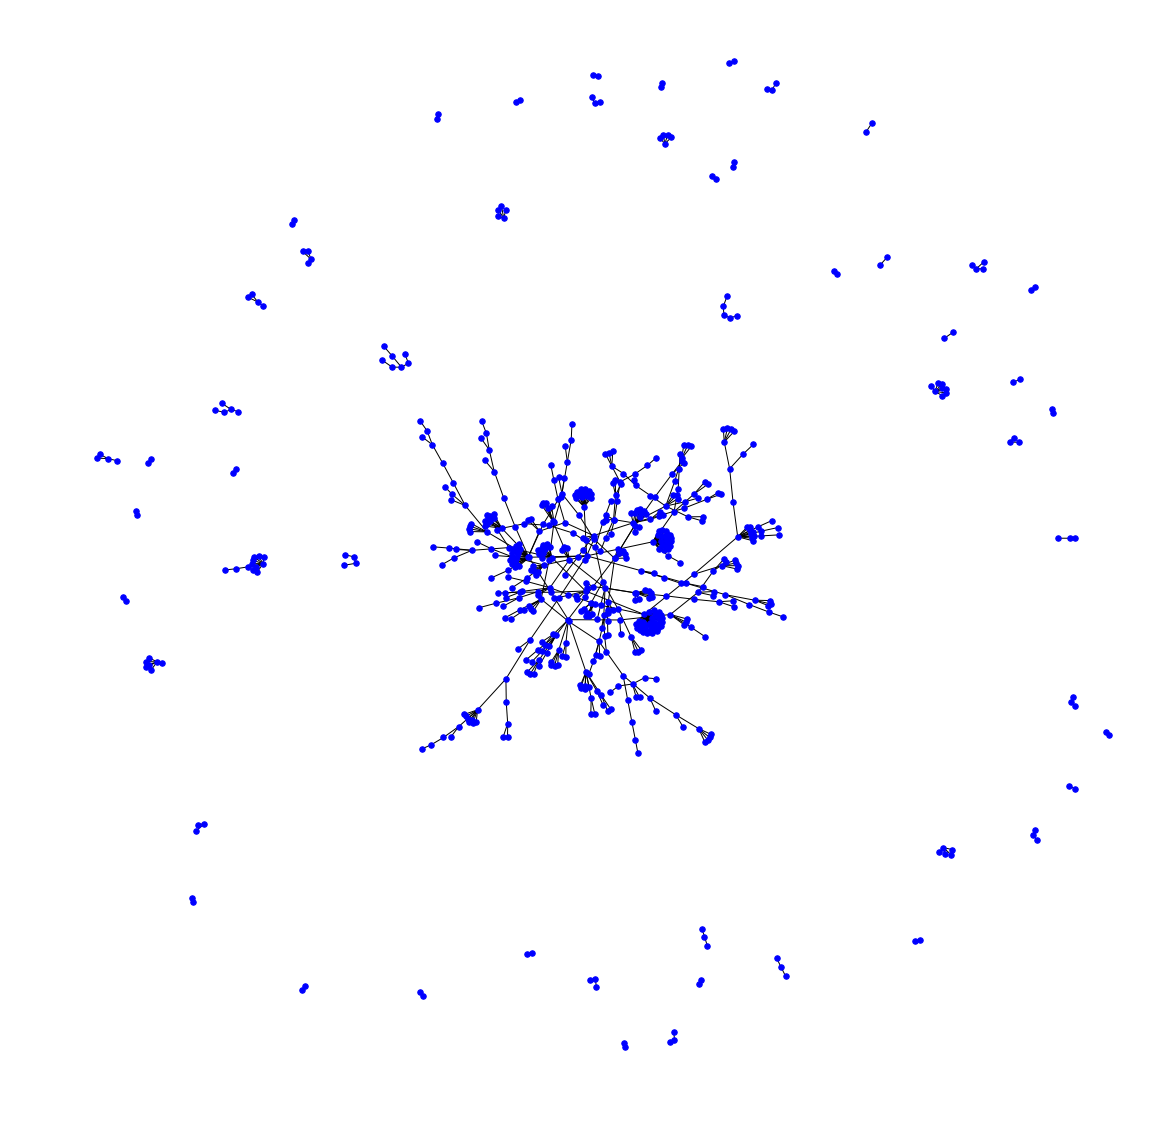

In [29]:
#Q4. calcualte the minimum spanning tree in g and draw it.
T = nx.minimum_spanning_tree(g)
print(nx.info(T))
#list(T.edges(data=False))
pos = nx.spring_layout(T)
plt.figure(figsize=(20,20))
nx.draw_networkx(T, pos=pos, with_labels=False,
                 node_color='b',
                 node_size= 30 )
plt.axis('off')



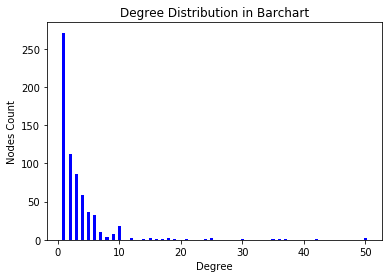

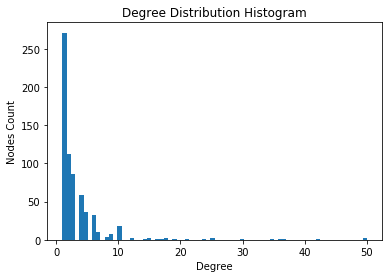

In [30]:
#Q5. Draw the degree distribution histogram.

#take degrees from network(g)
degree_sequence = sorted([d for n, d in g.degree()], reverse=True)
#print(degree_sequence)

#count  degree frequency
degreeCount = Counter(degree_sequence)
#print(degreeCount)

#separate degree for x-axis and its counts for y-axis
deg, cnt = zip(*degreeCount.items())
#print(deg,cnt)


#create figure
fig, ax = plt.subplots()
#ax.plot(deg, cnt, 'ro-')
ax.bar(deg, cnt, width=0.50, color='b') #creates bar chart graph of degree showing no. of nodes
plt.title("Degree Distribution in Barchart")
plt.xlabel("Degree")
plt.ylabel("Nodes Count")
plt.show()


'''Alternative way to plot histrogam of the degree in netowrk (g) by using 'hist' fucntion in matplotlib'''

#create histogram for degree
plt.hist(degree_sequence, bins='auto') #auto bin size is used
plt.title("Degree Distribution Histogram")
plt.xlabel("Degree")
plt.ylabel("Nodes Count")
plt.show()


(-1.0874512815539052,
 0.7729188061587995,
 -0.7932605753838561,
 0.874109332016254)

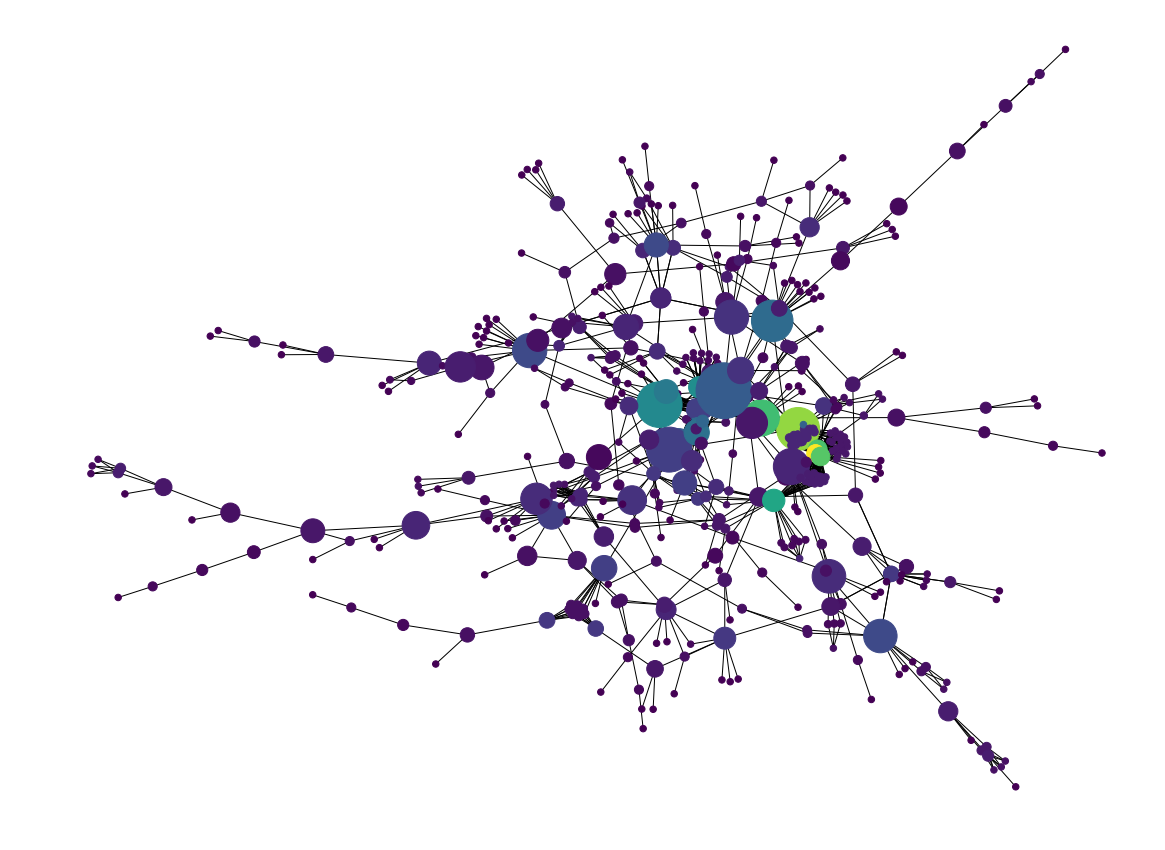

In [31]:
#Compute largest connected component of the network  (LC)

#lsit the components in network (g)
components = nx.connected_components(g)

#compare among components and find the one having maximun length(LC)
largest_component = max(components, key=len)
#largest_component

# Q1.draw LC
subgraph = g.subgraph(largest_component)
pos = nx.spring_layout(subgraph) # force nodes to separte 
betCent = nx.betweenness_centrality(subgraph, normalized=True, endpoints=True)
node_color = [20000.0 * g.degree(v) for v in subgraph]
node_size =  [v * 10000 for v in betCent.values()]
plt.figure(figsize=(20,15))
nx.draw_networkx(subgraph, pos=pos, with_labels=False,
                 node_color=node_color,
                 node_size=node_size)
plt.axis('off')

In [32]:
# Q2.compute diameter
diameter = nx.diameter(subgraph)
print("Diameter of LC:", diameter)

Diameter of LC: 18


In [33]:
#Q3.compute center
center = nx.center(subgraph)
print('Center of LC: ', center)

Center of LC:  ['W02D3.9']


In [34]:
# Q4.find number of clique communities with 3 nodes
cli_num = list(k_clique_communities(subgraph,3))
print('clique communities with 3 nodes: ', len(cli_num))

clique communities with 3 nodes:  31


In [35]:
#Q5. node(protein) having biggest influences in LC when changing its status

#claculates eigenvector centrality in  LC
eigen_cent = nx.eigenvector_centrality(subgraph)
#sorted_eigen=sorted(eigen_cent, key=eigen_centrality.get)
sorted_eigen =sorted(eigen_cent.items(), key=itemgetter(1), reverse=True)
sorted_eigen[1][0]

'F58A4.3'

In [36]:
#calcualtes degree centrality
degree_cent = nx.algorithms.degree_centrality(subgraph)
sorted_degree = sorted(degree_cent.items(), key=itemgetter(1), reverse=True)
sorted_degree[1][0]

'F58A4.3'

In [37]:
#calcualtes betweenness centrality in LC
betweenness_cent = nx.betweenness_centrality(subgraph, normalized=True, endpoints=True)
sorted_betweenness = sorted(betweenness_cent.items(), key= itemgetter(1), reverse=True)
sorted_betweenness[1][0]


'W02D3.9'